In [1]:
%matplotlib inline

import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
from boundary import *

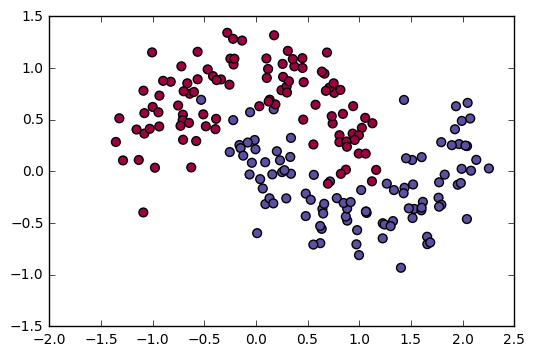

In [2]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [3]:
from dynet import *

In [6]:
lr_model = Model()

model_hidden_size = 100

# Hidden layer weights/biases
pHW = lr_model.add_parameters((model_hidden_size,2))
pHb = lr_model.add_parameters(model_hidden_size)

pW = lr_model.add_parameters((1,model_hidden_size))
pb = lr_model.add_parameters((1))

renew_cg()

HW = parameter(pHW)
Hb = parameter(pHb)

W = parameter(pW)
b = parameter(pb)

x = vecInput(2)

# try: logistic, tanh, rectify
output = logistic(W * logistic(HW*x + Hb) + b)
y = scalarInput(0)
loss = binary_log_loss(output, y)

trainer = SimpleSGDTrainer(lr_model)

In [7]:
n_epochs = 1000

for epoch in range(n_epochs):
    total_loss = 0
    seen = 0
    for (x_i, y_i) in zip(X, Y):
        x.set(x_i)
        y.set(y_i)
        seen += 1
        total_loss += loss.value()
        loss.backward()
        trainer.update()
    
    if epoch != 0 and epoch % 100 == 0:
        print("epoch %d average loss: %.4f" % (epoch, total_loss / seen))

epoch 100 average loss: 0.3279
epoch 200 average loss: 0.1133
epoch 300 average loss: 0.1091
epoch 400 average loss: 0.1071
epoch 500 average loss: 0.1054
epoch 600 average loss: 0.1037
epoch 700 average loss: 0.1020
epoch 800 average loss: 0.0999
epoch 900 average loss: 0.0971


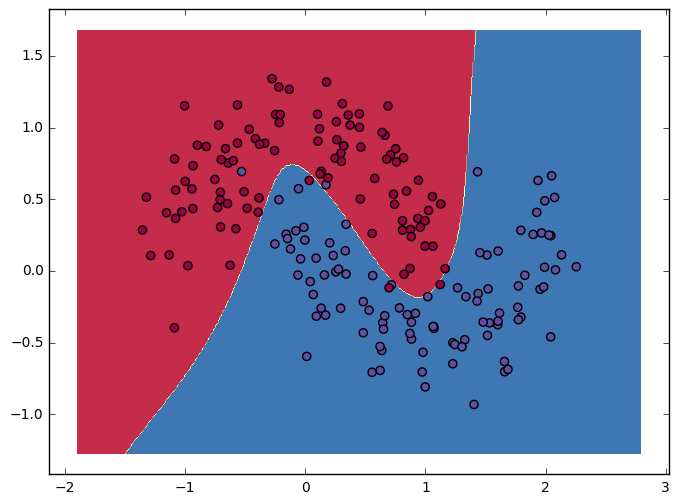

In [8]:
plot_decision_boundary(x, output, X, Y)